In [ ]:
!pip install ucimlrepo

Input yang ada di web

- JK
- Berat Badan (BB)
- Tinggi Badan (TB)
- Tanggal Lahir (TGL)
- Tanggal Ukur

Untuk hitung BMI

----------------------------------------------------------

Z-score = 15 THN ke atas ( BMI Aja )
        = 5 - 14 ( BMI / Umur )

Rumus menghitung Z-score untuk laki laki dan perempuan beda untuk 5 - 14 ( BMI / Umur )

----------------------------------------------------------

PT4A 32 2 0 N M DATE OF BIRTH-DAY
PT4B 34 2 0 N M DATE OF BIRTH - MONTH
PT4C 36 2 0 N M DATE OF BIRTH - YEAR

Untuk mengetahui umur di kurangin MEASUREMENT - BIRTH

PT8A 49 2 0 N M DATE OF MEASUREMENT-DAY
PT8B 51 2 0 N M DATE OF MEASUREMENT-MONTH
PT8C 53 2 0 N M DATE OF MEASUREMENT-YEAR

In [ ]:
import pandas as pd
import re
import string
import joblib

from ucimlrepo import fetch_ucirepo
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = '/content/data_baru_guatemala.xlsx'
df = pd.read_excel(file_path)

# EDA

In [ ]:
df.head()

,SEX,CASEID,CASE,PT2,PT4A,PT4B,PT4C,PT5,PT6,PT7,...,HAM,HAP,HAZ,WAM,WAP,WAZ,WHM,WHP,WHZ,FLAG
0,MALE,NaN,4 115A 2,NaN,27,4,60,155.6,NaN,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FEMALE,NaN,4 115A 2,5.0,27,10,93,82.7,LYING DOWN,24.4,...,96.14,15.58,-1.01,90.47,18.23,-0.91,96.51,32.70,-0.45,CONSISTENT DATA
2,MALE,NaN,4 115A 4,NaN,99,5,74,148.7,NaN,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,NaN,4 115A 4,1.0,31,5,90,101.1,STANDING,38.3,...,91.93,2.51,-1.96,95.96,35.75,-0.37,110.91,84.57,1.02,CONSISTENT DATA
4,MALE,NaN,4 115A 4,2.0,9,1,92,97.2,STANDING,30.2,...,98.19,32.46,-0.45,89.39,15.81,-1.00,93.50,23.01,-0.74,CONSISTENT DATA


In [ ]:
df.describe()

,CASEID,PT2,PT4A,PT4B,PT4C,PT5,PT7,PT8A,PT8B,PT8C,...,BMI,HAM,HAP,HAZ,WAM,WAP,WAZ,WHM,WHP,WHZ
count,0.0,3370.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.0,...,3269.000000,3234.000000,3234.000000,3234.000000,3273.000000,3273.000000,3273.00000,3232.000000,3232.000000,3232.000000
mean,NaN,3.443027,19.135050,7.152716,82.033515,127.496797,80.550041,18.232458,8.546805,95.0,...,16.505616,90.648986,7.349579,-2.371296,84.210999,15.452912,-1.47839,101.043815,49.453196,0.018840
std,NaN,1.989999,18.921741,8.804925,12.321903,126.604791,135.330417,13.786616,11.470491,0.0,...,1.596718,5.094438,15.786880,1.298205,12.085085,21.645592,1.08942,10.167294,26.754232,0.938959
min,NaN,1.000000,1.000000,1.000000,59.000000,32.300000,4.600000,1.000000,5.000000,95.0,...,8.730000,75.370000,0.000000,-5.900000,51.670000,0.000000,-4.66000,70.470000,0.040000,-3.380000
25%,NaN,2.000000,8.000000,4.000000,70.000000,79.500000,22.900000,8.000000,6.000000,95.0,...,15.490000,87.290000,0.060000,-3.230000,76.420000,1.400000,-2.20000,94.487500,27.457500,-0.600000
50%,NaN,3.000000,16.000000,6.000000,90.000000,100.000000,34.600000,19.000000,7.000000,95.0,...,16.380000,90.500000,0.805000,-2.405000,82.920000,5.830000,-1.57000,99.595000,48.185000,-0.050000
75%,NaN,5.000000,24.000000,9.000000,93.000000,146.700000,106.000000,26.000000,8.000000,95.0,...,17.350000,93.830000,5.967500,-1.560000,90.730000,20.400000,-0.83000,105.780000,70.302500,0.530000
max,NaN,12.000000,99.000000,99.000000,99.000000,999.000000,999.000000,99.000000,99.000000,95.0,...,30.430000,122.640000,99.800000,5.790000,158.700000,99.800000,4.15000,160.990000,99.800000,5.300000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       6057 non-null   object 
 1   CASEID    0 non-null      float64
 2   CASE      6057 non-null   object 
 3   PT2       3370 non-null   float64
 4   PT4A      6057 non-null   int64  
 5   PT4B      6057 non-null   int64  
 6   PT4C      6057 non-null   int64  
 7   PT5       6057 non-null   float64
 8   PT6       3370 non-null   object 
 9   PT7       6057 non-null   float64
 10  PT8A      6057 non-null   int64  
 11  PT8B      6057 non-null   int64  
 12  PT8C      6057 non-null   int64  
 13  PT9       6057 non-null   object 
 14  PT9OTRO   11 non-null     object 
 15  PT10B     6057 non-null   int64  
 16  KG_WGT    3370 non-null   float64
 17  DATEFIX   6057 non-null   object 
 18  RESETHT   6057 non-null   object 
 19  RESETWT   6057 non-null   object 
 20  REVERSE   6057 non-null   obje

In [ ]:
df.columns

Index(['SEX', 'CASEID', 'CASE', 'PT2', 'PT4A', 'PT4B', 'PT4C', 'PT5', 'PT6',
       'PT7', 'PT8A', 'PT8B', 'PT8C', 'PT9', 'PT9OTRO', 'PT10B', 'KG_WGT',
       'DATEFIX', 'RESETHT', 'RESETWT', 'REVERSE', 'PT4AORIG', 'PT4BORIG',
       'PT4CORIG', 'PT5ORIG', 'PT7ORIG', 'PT9ORIG', 'BMI', 'HAM', 'HAP', 'HAZ',
       'WAM', 'WAP', 'WAZ', 'WHM', 'WHP', 'WHZ', 'FLAG'],
      dtype='object')

In [ ]:
df.shape

(6057, 38)

## Cek Data Nan

In [ ]:
duplicates = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicates.shape[0]} \n")

duplicates

Jumlah baris duplikat: 0 



,SEX,CASEID,CASE,PT2,PT4A,PT4B,PT4C,PT5,PT6,PT7,...,HAM,HAP,HAZ,WAM,WAP,WAZ,WHM,WHP,WHZ,FLAG


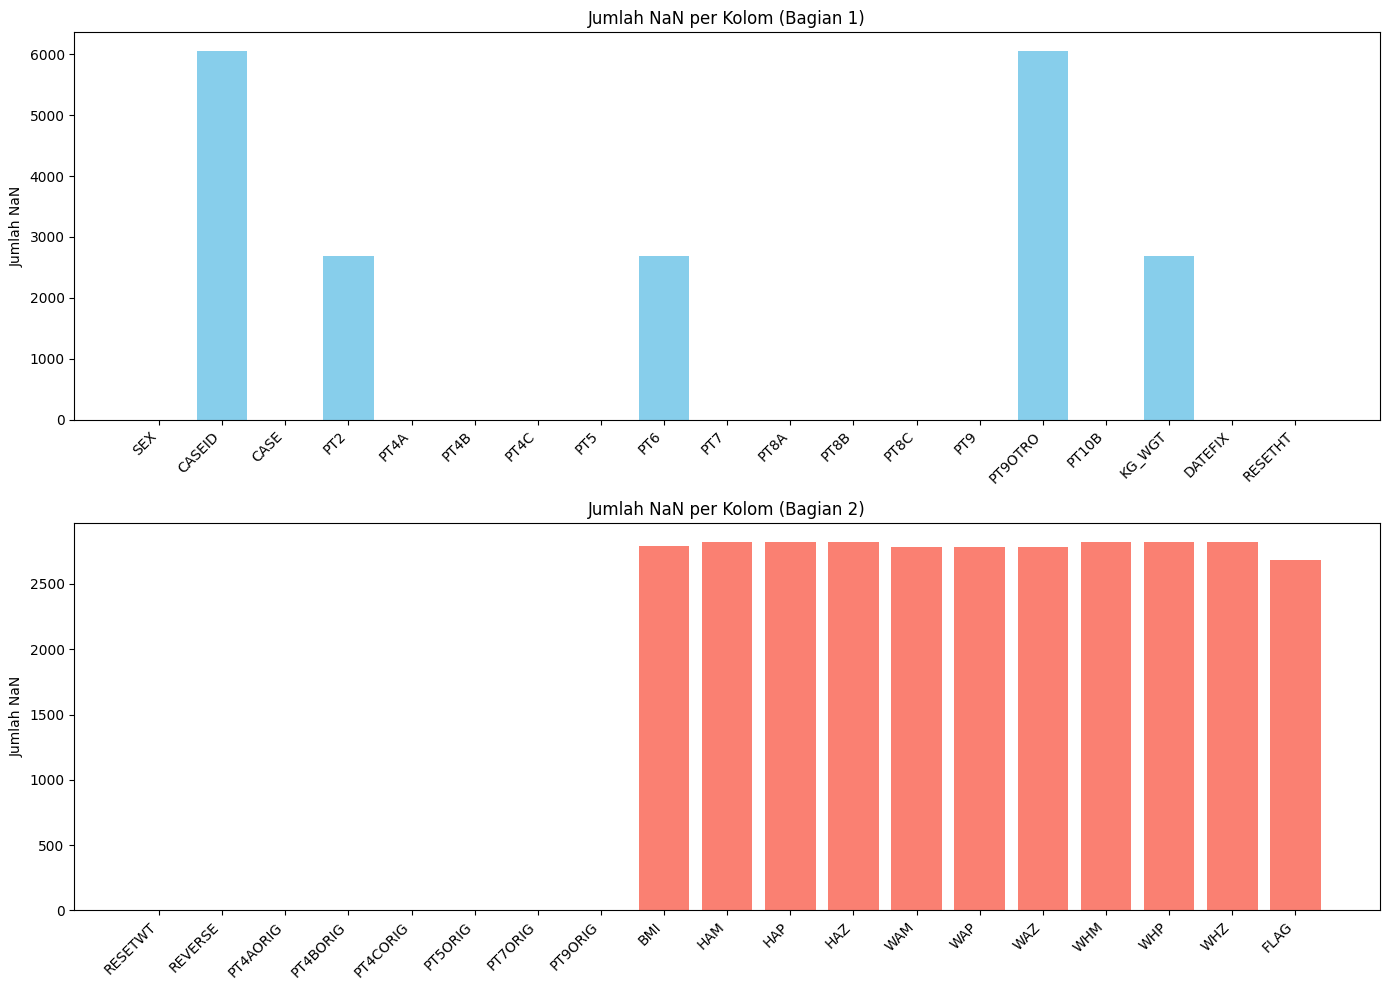

In [ ]:
nan_counts = df.isna().sum()

midpoint = len(nan_counts) // 2
nan_part1 = nan_counts.iloc[:midpoint]
nan_part2 = nan_counts.iloc[midpoint:]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].bar(nan_part1.index, nan_part1.values, color='skyblue')
axes[0].set_title('Jumlah NaN per Kolom (Bagian 1)')
axes[0].set_ylabel('Jumlah NaN')
axes[0].set_xticks(range(len(nan_part1)))
axes[0].set_xticklabels(nan_part1.index, rotation=45, ha='right')

axes[1].bar(nan_part2.index, nan_part2.values, color='salmon')
axes[1].set_title('Jumlah NaN per Kolom (Bagian 2)')
axes[1].set_ylabel('Jumlah NaN')
axes[1].set_xticks(range(len(nan_part2)))
axes[1].set_xticklabels(nan_part2.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Cek Outlier

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_info = {}
cols_with_outlier = []
cols_without_outlier = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_info[col] = len(outliers)

    if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0:
        cols_with_outlier.append(col)
    else:
        cols_without_outlier.append(col)

outlier_df = pd.DataFrame.from_dict(outlier_info, orient='index', columns=['Jumlah Outlier'])
outlier_df.sort_values(by='Jumlah Outlier', ascending=False)

,Jumlah Outlier
HAP,457
WAP,315
PT4A,263
PT4AORIG,262
WHM,120
PT9ORIG,119
PT5,116
PT7,115
KG_WGT,100
PT8B,95


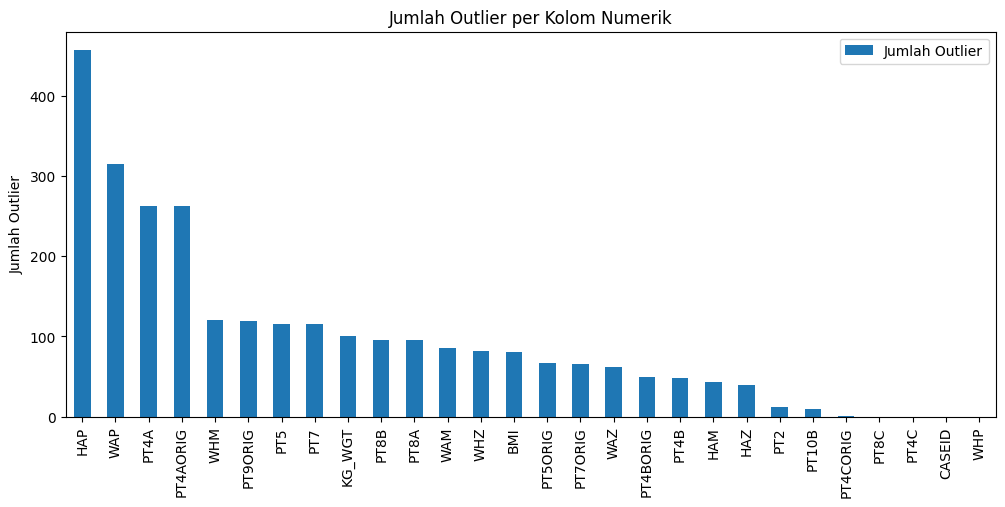

In [ ]:
outlier_df.sort_values(by='Jumlah Outlier', ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title('Jumlah Outlier per Kolom Numerik')
plt.ylabel('Jumlah Outlier')
plt.show()

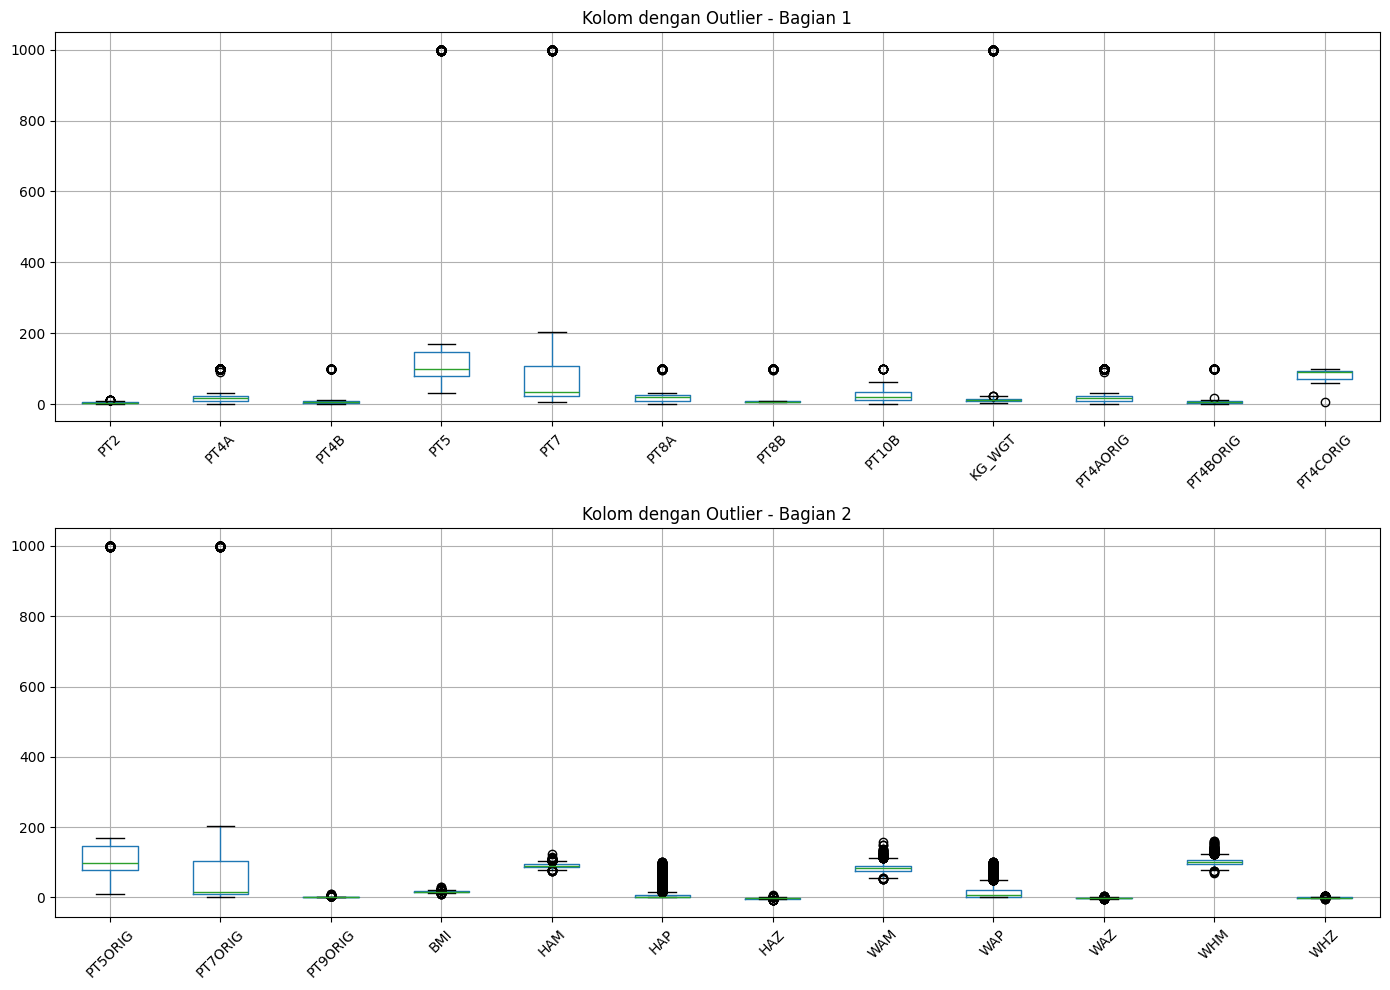

In [ ]:
midpoint = len(cols_with_outlier) // 2
part1 = cols_with_outlier[:midpoint]
part2 = cols_with_outlier[midpoint:]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

df[part1].boxplot(ax=axes[0])
axes[0].set_title('Kolom dengan Outlier - Bagian 1')
axes[0].tick_params(axis='x', rotation=45)

df[part2].boxplot(ax=axes[1])
axes[1].set_title('Kolom dengan Outlier - Bagian 2')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

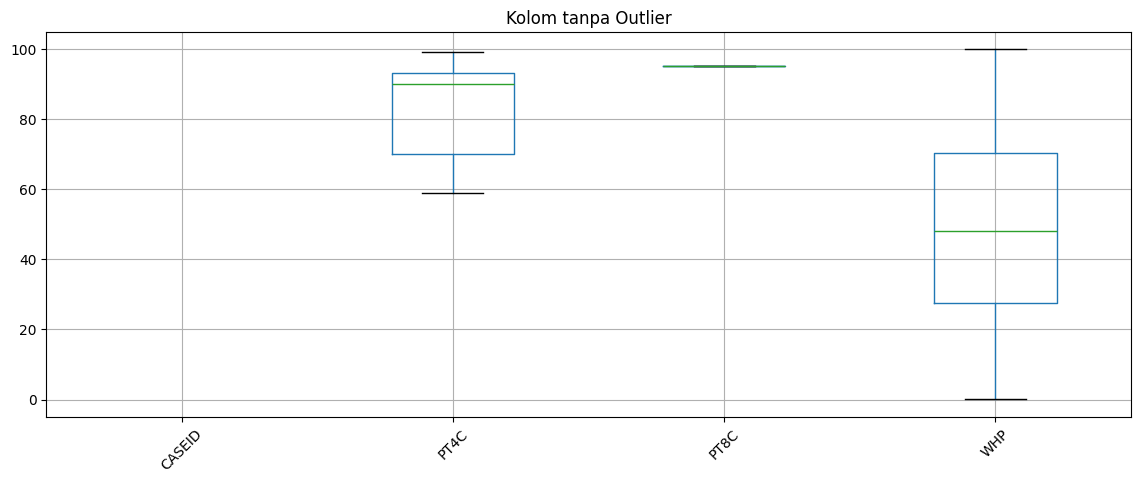

In [ ]:
if cols_without_outlier:
    plt.figure(figsize=(14, 5))
    df[cols_without_outlier].boxplot()
    plt.title('Kolom tanpa Outlier')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Tidak ada kolom tanpa outlier.")

## Cleaning Data

## Cek Distribusi Class Target

In [ ]:
df["BMI"].head()

,BMI
0,NaN
1,16.18
2,NaN
3,16.99
4,14.50


In [ ]:
def bmi_to_category(z_score):
    if z_score < -3:
        return "Gizi buruk"
    elif -3 <= z_score < -2:
        return "Gizi kurang"
    elif -2 <= z_score <= 1:
        return "Gizi baik"
    elif 1 < z_score <= 2:
        return "Berisiko gizi lebih"
    elif 2 < z_score <= 3:
        return "Gizi lebih"
    else:  # z_score > 3
        return "Obesitas"

In [ ]:
df["BMI_Target"] = df["WHZ"].apply(lambda x: bmi_to_category(x) if pd.notnull(x) else None)

print(df[["BMI", "WHZ", "BMI_Target"]].head())

     BMI   WHZ           BMI_Target
0    NaN   NaN                 None
1  16.18 -0.45            Gizi baik
2    NaN   NaN                 None
3  16.99  1.02  Berisiko gizi lebih
4  14.50 -0.74            Gizi baik


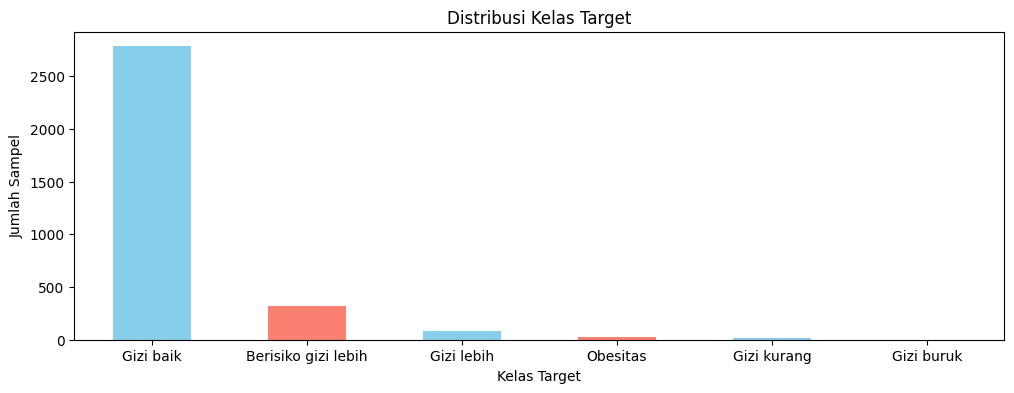

In [ ]:
plt.figure(figsize=(12, 4))
df["BMI_Target"].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

## Encode & Mapping Label

In [ ]:
label_encoder = LabelEncoder()

df["BMI_Target_Encoded"] = label_encoder.fit_transform(df["BMI_Target"])

label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

print("Mapping label:", label_mapping)
print(df[["BMI_Target", "BMI_Target_Encoded"]].head())

# Feature Selection

In [ ]:
target_col = 'BMI'

In [ ]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

mi_scores.plot(kind='bar', figsize=(15,5))
plt.title("Skor Mutual Information Terhadap BMI")
plt.show()

In [ ]:
low_score_features = mi_scores[mi_scores < 0.01].index
X_cleaned = X.drop(columns=low_score_features)

print("Fitur yang dihapus:", list(low_score_features))

In [ ]:
len(low_score_features)

# Split Dataset

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_cleaned, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=42)

print(f"Train: {len(X_train)} data")
print(f"Valid: {len(X_val)} data")
print(f"Test : {len(X_test)} data")

Train: 4241 data
Valid: 907 data
Test : 909 data


# Oversampling

In [ ]:
smote = SMOTE(random_state=42)

X_train, y_train = X_train.drop(columns=[target_col]), X_train[target_col]
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nSetelah SMOTE Oversampling:")
print(f"Train: {X_train_res.shape}, Kelas: {y_train_res.value_counts().to_dict()}")

# Modeling

In [ ]:
k_values = [1, 3, 5, 7, 9]
metrics_result = {'k': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res, y_train_res)
    y_pred = knn.predict(X_val)

    metrics_result['k'].append(k)
    metrics_result['accuracy'].append(accuracy_score(y_val, y_pred))
    metrics_result['precision'].append(precision_score(y_val, y_pred, average='weighted'))
    metrics_result['recall'].append(recall_score(y_val, y_pred, average='weighted'))
    metrics_result['f1'].append(f1_score(y_val, y_pred, average='weighted'))

metrics_df = pd.DataFrame(metrics_result)

In [ ]:
print("\nHasil evaluasi di Validation set:\n", metrics_df)

# Evaluasi

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['k'], metrics_df['accuracy'], marker='o', label='Accuracy')
plt.plot(metrics_df['k'], metrics_df['precision'], marker='o', label='Precision')
plt.plot(metrics_df['k'], metrics_df['recall'], marker='o', label='Recall')
plt.plot(metrics_df['k'], metrics_df['f1'], marker='o', label='F1 Score')
plt.xlabel('Nilai k')
plt.ylabel('Score')
plt.title('Perbandingan Metrik untuk Berbagai Nilai k')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_k = metrics_df.loc[metrics_df['f1'].idxmax(), 'k']
print(f"Best k: {best_k}")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_res, y_train_res)

In [ ]:
y_pred_test = final_knn.predict(X_test)

In [ ]:
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
joblib.dump(final_knn, 'knn_model.pkl')
print("Model saved as knn_model.pkl")

# Test Data

In [ ]:
loaded_model = joblib.load('knn_model.pkl')
print("Model loaded successfully!")

In [ ]:
sample_pred = loaded_model.predict(X_test)
print("Prediction from loaded model matches:", np.array_equal(sample_pred, y_pred_test))

In [ ]:
def kategori_bmi(z_score):
    if z_score < -3:
        return "Gizi buruk (severely wasted)"
    elif -3 <= z_score < -2:
        return "Gizi kurang (wasted)"
    elif -2 <= z_score <= 1:
        return "Gizi baik (normal)"
    elif 1 < z_score <= 2:
        return "Berisiko gizi lebih (possible risk of overweight)"
    elif 2 < z_score <= 3:
        return "Gizi lebih (overweight)"
    elif z_score > 3:
        return "Obesitas (obese)"
    else:
        return "Tidak terdefinisi"

data_uji = pd.DataFrame([{
    "SEX": 1,
    "CASEID": 12345,
    "CASE": 1,
    "PT2": 2,
    "PT4A": 1,
    "PT4B": 2,
    "PT4C": 3,
    "PT5": 2,
    "PT6": 1,
    "PT7": 1,
    "PT8A": 2,
    "PT8B": 2,
    "PT8C": 2,
    "PT9": 1,
    "PT9OTRO": 0,
    "PT10B": 1,
    "KG_WGT": 35.0,
    "DATEFIX": "2025-08-11",
    "RESETHT": 1.45,
    "RESETWT": 35.0,
    "REVERSE": 0,
    "PT4AORIG": 1,
    "PT4BORIG": 2,
    "PT4CORIG": 3,
    "PT5ORIG": 2,
    "PT7ORIG": 1,
    "PT9ORIG": 1,
    "HAM": 0,
    "HAP": 0,
    "HAZ": 0,
    "WAM": 0,
    "WAP": 0,
    "WAZ": 0,
    "WHM": 0,
    "WHP": 0,
    "WHZ": 0,
    "FLAG": 0
}])

In [ ]:
prediksi_bmi = loaded_model.predict(data_uji)[0]

kategori = kategori_bmi(prediksi_bmi)
print(f"Prediksi BMI: {prediksi_bmi:.2f} → {kategori}")